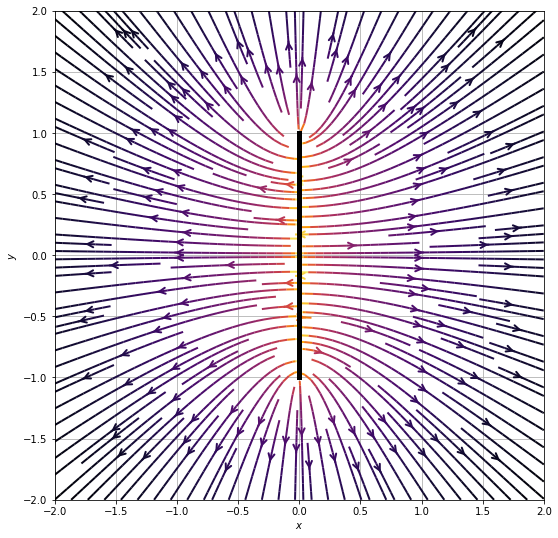

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines

l = 2 # length of line

nx, ny = 512, 512 # boundaries
x = np.linspace(-2, 2, nx) # array for x part of space
y = np.linspace(-2, 2, ny) # array for y part of space

k = 1 # coefficient
lmd = 1 # charge
Ex = np.zeros((nx,ny)) # array for x field component
Ey = np.zeros((nx,ny)) # array for y field component

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111)

for i in range(len(x)):
  for j in range(len(y)):
    # special formulas was derived and used here
    # a and b are distances from line
    a = y[j] - l/2
    b = x[i]
    if a <= l/2 or a >= -l/2:
      Ey[j][i] =  k*lmd*( 1/( (b**2 + a**2)**(1/2) ) - 1/( (b**2 + (l + a)**2)**(1/2) ) )
      Ex[j][i] =  k*lmd/b*( (l + a)/( (b**2 + (l + a)**2 )**(1/2) ) - a / ( (b**2 + a**2)**(1/2) ) )
    elif a > l/2 or a < -l/2:
      Ey[j][i] = k*lmd/b*( (l - a)/( ((l - a)**2 + b**2)**(1/2) ) + a / ( (a**2 + b**2)**(1/2) ) )
      Ex[j][i] = k*lmd*( 1/( ((l - a)**2 + b**2 )**(1/2) ) + 1/( (a**2 + b**2)**(1/2) ) )

color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=2, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

ax.add_artist(lines.Line2D([0,0], [-l/2,l/2],  linewidth = 5, color = 'black'))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.grid()
plt.show()